## Using KNN to predict Survival from the Titanic Dataset

**Problem Statement**
* Predict survival from the Titanic data based on given features

**Success Metrics**
* Attain 80% accuracy level for correct prediction

**Understanding the Context**
* Given the details of persons who were on board the Titanic virgin voyage, we wish to use the KNN algorithm to determine whether a passanger was likely to survive

**Experimental Design**

* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset
* Build a classification model to determine whether a passanger was likely to survice on the basis of chosen predictor features
* Evaluate the model
* Challenge your solution by providing insights on how you can make improvements in model improvement.


**Data Relevance**

The data available has information about the passangers who were on board the Titanic in its maiden voyage. It contains the PassangerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked. These shall be evaluated and the most relevant features for the model determined for use in the model.

In [61]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [62]:
# Loading our dataset
# Dataset one
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [63]:
# Checking columns un the train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Survived is the independent variable.

In [91]:
# Checking columns contained in the test data set
test.columns 

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* This data does not contain the label/independent variable column and is therefore not useful in a supervised learning problem

In [64]:
# Understanding the dataset
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Checking the dimension of the data
train.shape

(891, 12)

In [66]:
# Checking the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
# Removing unnecessary features like PassengerId, Name, Ticket, Fare, Cabin
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [68]:
# Checking for presence of missing data in the data
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

* The 'Age' column has got the most missing values while 'Embarked' column has got ony 2
* The missing values in the 'Age' column can be filled uding the median age
* The missing values in the'Embarked' column can be filled with the most appearing values

In [69]:
# Filling the missing values in the 'Age' column
train['Age'] = train['Age'].fillna(train.Age.median())

In [70]:
# Exploring the Age feature for possible outliers
train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [71]:
# Finding the modal entry in the Embarkment colum
train.Embarked.mode()

0    S
dtype: object

In [72]:
# Filling in the modal value into the 'Embarkment' values to the missing values
train['Embarked'] = train['Embarked'].fillna('S')

In [73]:
# Checking the missing values once more
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [74]:
# Creating age groups of Adults and Non-Adults
# Add a new column named 'Price' 
train['Adult'] = [1 if x >= 18 else 0 for x in train['Age']] 

In [75]:
# Checking the new DataFrame 
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adult
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,1


In [76]:
# Dropping the Age column
train = train.drop(['Age'], axis=1)

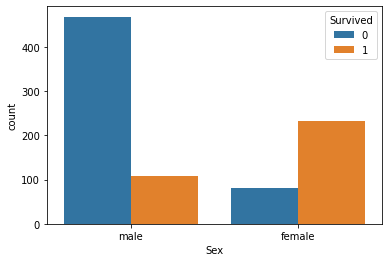

In [77]:
# Sex vs Survived
sns.countplot(x ='Sex', data = train, hue='Survived') 
plt.show() 

* More female survived than males

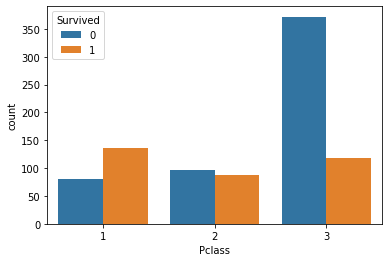

In [78]:
# Pclass vs Survived
sns.countplot(x ='Pclass', data = train, hue='Survived') 
plt.show() 

* The probability of survival was high from **Pclass 1** than in any other class, this was however lowest in **Pclass 3**

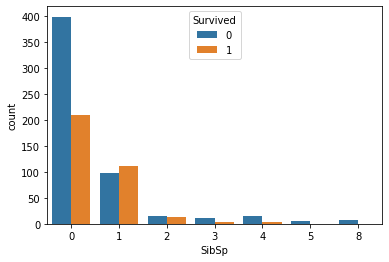

In [79]:
# SibSp Vs Survived
sns.countplot(x ='SibSp', data = train, hue='Survived') 
plt.show() 

* The number of of persons survived was higher in SibSp 0, followed by SibSp 1

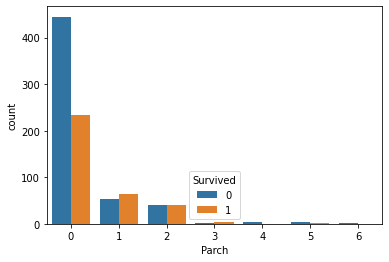

In [80]:
# Parch Vs Survived
sns.countplot(x ='Parch', data = train, hue='Survived') 
plt.show() 

* The number of persons who survived was highest in Parch 0, followed by 1 and so on

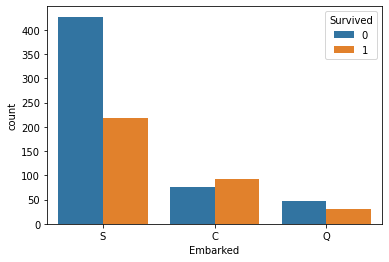

In [81]:
# Embarked Vs Survived
sns.countplot(x ='Embarked', data = train, hue='Survived') 
plt.show() 

* The number of persons who survived was higher in Embarked S, followed by C then finally Q

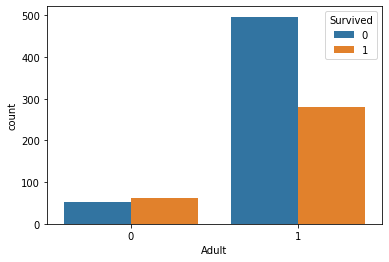

In [82]:
# Adult Vs Survived
sns.countplot(x ='Adult', data = train, hue='Survived') 
plt.show() 

* More adults survived than children

* This look however does not factor the proportions

In [83]:
# Correlation matrix
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Parch       0.081629
SibSp      -0.035322
Adult      -0.122239
Pclass     -0.338481
Name: Survived, dtype: float64

Label Encoding

In [84]:
print('Survived: ', train.Survived.unique())
print('Pclass: ' ,train.Pclass.unique())
print('Sex:' ,train.Sex.unique())
print('SibSp: ' ,train.SibSp.unique())
print('Parch: ', train.Parch.unique())
print('Embarked: ' ,train.Embarked.unique())
print('Adult' ,train.Adult.unique())

Survived:  [0 1]
Pclass:  [3 1 2]
Sex: ['male' 'female']
SibSp:  [1 0 3 4 2 5 8]
Parch:  [0 1 2 5 3 4 6]
Embarked:  ['S' 'C' 'Q']
Adult [1 0]


* The 'Embarked' and 'Sex' columns require encoding

In [85]:
labelEncoder = LabelEncoder()
train['Sex'] = labelEncoder.fit_transform(train['Sex'])
train['Embarked'] = labelEncoder.fit_transform(train['Embarked'])

In [86]:
# Previewing the data
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Adult
0,0,3,1,1,0,2,1
1,1,1,0,1,0,0,1
2,1,3,0,0,0,2,1
3,1,1,0,1,0,2,1
4,0,3,1,0,0,2,1


In [87]:
# Checking the data types of the final DataFrame
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
SibSp       int64
Parch       int64
Embarked    int64
Adult       int64
dtype: object

In [88]:
# Converting the data types into type category
cols = list(train.columns)
for col in cols:
  train[col] = train[col].astype('category')

train.dtypes

Survived    category
Pclass      category
Sex         category
SibSp       category
Parch       category
Embarked    category
Adult       category
dtype: object

Defining the dependent and independent variable

In [89]:
# Dependent and independent variables
X = train.drop(['Survived'], axis=1)
y = train.Survived

**Splitting the Data and Building the Model**

* The data shall be split into 80 - 20, 70 - 30 and 60 - 40 trainiing and testing datasets whih chall be evaluated separately

In [90]:
# Splitting the dataset

# Various test dataset sizes 20%, 30% and 40%
test_sizes = [0.2, 0.3, 0.4]
for size in test_sizes:

  # Splitter function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)

  # Number of neighbors
  k_range = range(1, 20)

  scores = []
  
  print('')
  print('Test size: ', size*100,'%')

  # Fitting and evaluating the model
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x1, train_y1)
    y_pred = knn.predict(test_x1)
    scores.append(metrics.accuracy_score(test_y1, y_pred))
  print(scores)


Test size:  20.0 %
[0.7653631284916201, 0.7486033519553073, 0.776536312849162, 0.7486033519553073, 0.7486033519553073, 0.7374301675977654, 0.7597765363128491, 0.7597765363128491, 0.770949720670391, 0.7541899441340782, 0.7653631284916201, 0.7486033519553073, 0.7541899441340782, 0.7486033519553073, 0.7597765363128491, 0.7486033519553073, 0.7597765363128491, 0.7486033519553073, 0.7597765363128491]

Test size:  30.0 %
[0.7653631284916201, 0.7486033519553073, 0.776536312849162, 0.7486033519553073, 0.7486033519553073, 0.7374301675977654, 0.7597765363128491, 0.7597765363128491, 0.770949720670391, 0.7541899441340782, 0.7653631284916201, 0.7486033519553073, 0.7541899441340782, 0.7486033519553073, 0.7597765363128491, 0.7486033519553073, 0.7597765363128491, 0.7486033519553073, 0.7597765363128491]

Test size:  40.0 %
[0.7653631284916201, 0.7486033519553073, 0.776536312849162, 0.7486033519553073, 0.7486033519553073, 0.7374301675977654, 0.7597765363128491, 0.7597765363128491, 0.770949720670391, 0.7

* The accuracy scores at the different proportions of training data is the same

**Challenging the solution**
* The best accuracy level is attained with number of neighbors k = 3
* The best accuracy attained is at 77.65%, trying another model may lead to higher accuracy rates